In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784',version=1,data_home = './data', as_frame=False) #why tf does this take so long. Shit server?

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [5]:
#mnist.details

In [6]:
mnist.data #looks like all 0s(white) but there are non-zero floats in there up to 255(black)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
#mnist.data.max().max()

In [8]:
#isinstance(X, pd.DataFrame)

In [9]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [11]:
some_digit = X[0]
some_other_digit = X[1]
print(some_digit.shape)
some_digit_image = some_digit.reshape(28,28)
some_other_digit_image = some_other_digit.reshape(28,28)

(784,)


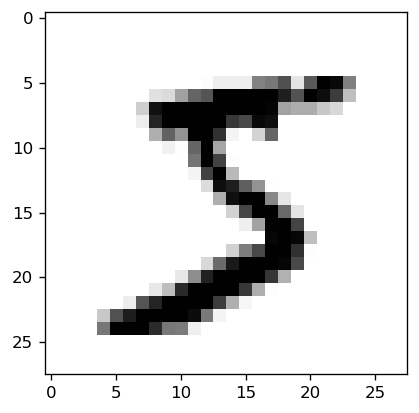

In [12]:
ifig=1;plt.close(ifig);plt.figure(ifig,figsize=(4,4), dpi=120)
plt.imshow(some_digit_image, cmap='binary')

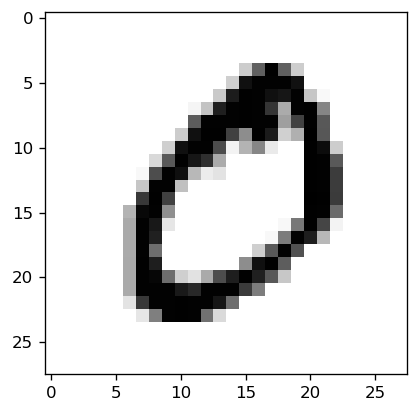

In [13]:
ifig=2;plt.close(ifig);plt.figure(ifig,figsize=(4,4), dpi=120)
plt.imshow(some_other_digit_image, cmap='binary')

In [14]:
#change y values to integers from strings
y = y.astype(np.uint8)

In [15]:
#In this case they have the data already in order to be used as a test and training set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
y_train_5 = (y_train == 5) #boolean arrays 
y_test_5 = (y_test == 5) 

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) #ugh
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

In [19]:
sgd_clf.predict([some_other_digit])

array([False])

In [20]:
#write a simple corss-validation algorithm
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [21]:
#clone?
#StratifiedKFold?

In [22]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    #print(train_index)
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
                              
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))                        

0.9669
0.91625
0.96785


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [24]:
#confusion matrix: matrix contaning no of false positives, false negatives, true positives and true negatives
#precision: TP/(TP+FP) true positives/total predictied potitives 
#recall: TP/(TP+FN) true positives/total positives that SHOULD be
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix
confM = confusion_matrix(y_train_5,y_train_pred)  
# [[True negatives, False positives], [False negatives, True positives]]

In [26]:
precision = confM[1,1]/(confM[1,1]+confM[0,1])
recall = confM[1,1]/(confM[1,1]+confM[1,0])

In [27]:
print('precision = {}'.format(precision), 'and recall = {}'.format(recall))

precision = 0.8370879772350012 and recall = 0.6511713705958311


In [28]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [29]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [30]:
#F1 score: harmonic mean of precision and recall (weighted toward lower vals) 
#high when precision and recall are similar
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [31]:
#you must decide if precision or recall is more important for a specific problem

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [33]:
from sklearn.metrics import precision_recall_curve

In [34]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

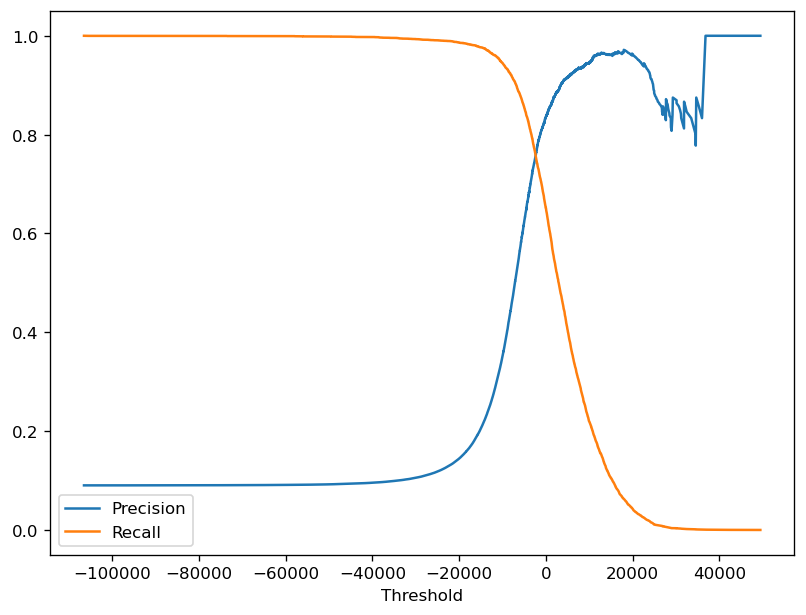

In [35]:
ifig=3;plt.close(ifig);plt.figure(ifig,figsize=(8,6), dpi=120)
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')

plt.legend()

Text(0.5, 0, 'Recall')

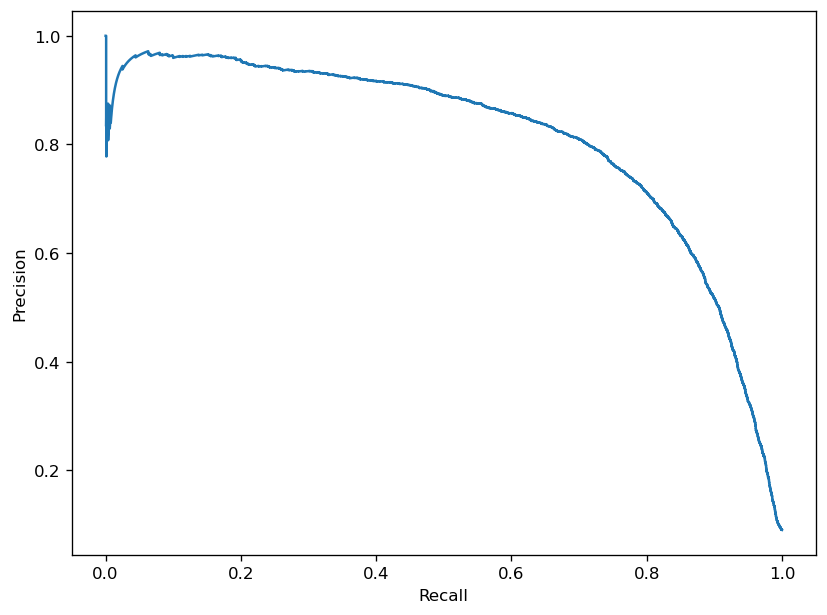

In [36]:
ifig=4;plt.close(ifig);plt.figure(ifig,figsize=(8,6), dpi=120)
plt.plot(recalls[:-1],precisions[:-1])
plt.ylabel('Precision')
plt.xlabel('Recall')

In [37]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [38]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [39]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [40]:
#ROC curve reciever operating characteristic
# true positive rate vs false positive rate = sensitivity vs 
#recall=sensitivity
from sklearn.metrics import roc_curve 
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

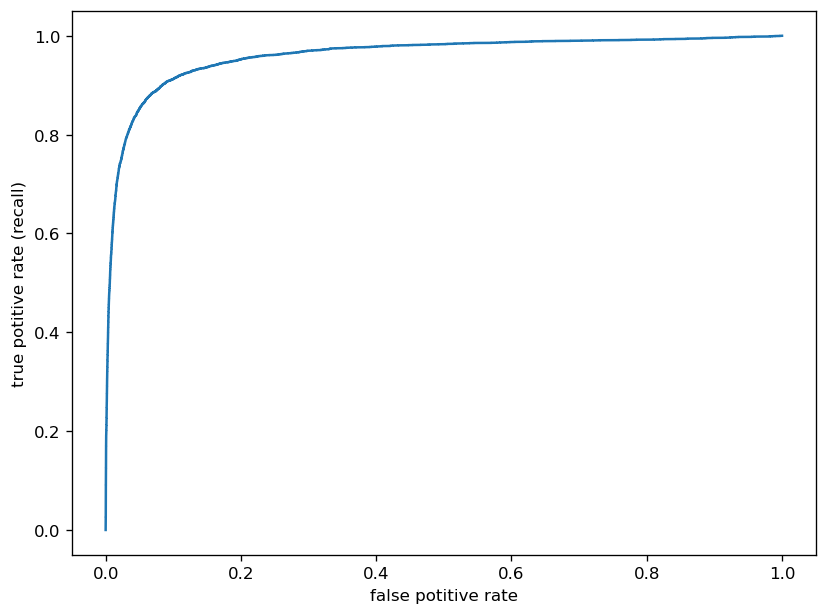

In [41]:
ifig=5;plt.close(ifig);plt.figure(ifig,figsize=(8,6), dpi=120)
plt.plot(fpr,tpr)
plt.xlabel('false potitive rate')
plt.ylabel('true potitive rate (recall)');

# try with random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [44]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

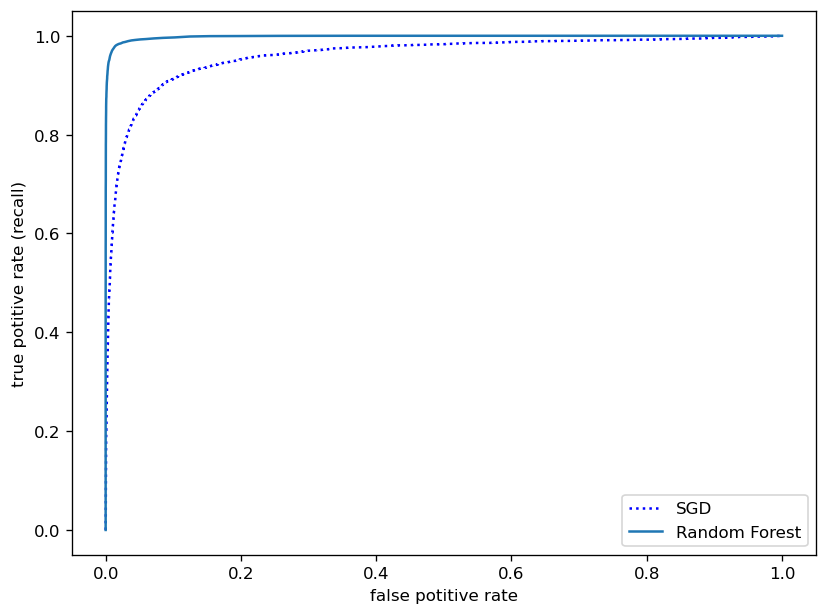

In [45]:
ifig=6;plt.close(ifig);plt.figure(ifig,figsize=(8,6), dpi=120)
plt.plot(fpr,tpr, 'b:', label='SGD')
plt.plot(fpr_forest,tpr_forest, label='Random Forest')
plt.xlabel('false potitive rate')
plt.ylabel('true potitive rate (recall)')
plt.legend();

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# multiclass classification

In [47]:
from sklearn.svm import SVC
svm_clf = SVC() #ses OvO by default
svm_clf.fit(X_train,y_train)

SVC()

In [48]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [49]:
svm_clf.predict([some_other_digit])

array([0], dtype=uint8)

In [50]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores #coincidence that 5 scored best???

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [51]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [52]:
ovr_clf.predict([some_other_digit])

array([0], dtype=uint8)

In [53]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [54]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [55]:
sgd_clf.decision_function([some_other_digit])

array([[ 14390.59839396, -36919.31719967,  -9811.47434817,
         -8054.56345089, -21825.25725463, -11313.62371972,
        -23649.39025808, -15986.78463914,  -3798.52944589,
        -10635.46503726]])

In [56]:
ovr_clf.decision_function([some_digit])

array([[-2.20788779, -2.52734154, -1.42209483, -0.89545795, -3.66438164,
         1.09884347, -3.13930844, -2.05006487, -2.51601851, -3.39312853]])

In [57]:
cross_val_score(sgd_clf, X_train, y_train, cv =3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [58]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.astype(np.float64))

In [59]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

# error analysis

In [60]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [61]:
from sklearn.metrics import plot_confusion_matrix

<Figure size 960x720 with 0 Axes>

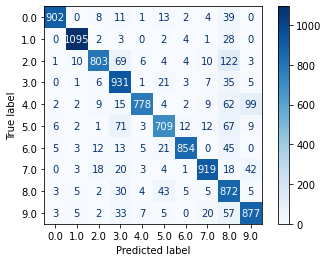

In [62]:
ifig=7;plt.close(ifig);plt.figure(ifig,figsize=(8,6), dpi=120)
plot_confusion_matrix(sgd_clf, X_test, y_test,\
                      display_labels=list(np.linspace(0,9,10)),cmap=plt.cm.Blues)

Text(0, 0.5, 'true')

<Figure size 960x720 with 0 Axes>

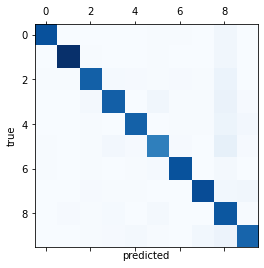

In [63]:
ifig=8;plt.close(ifig);plt.figure(ifig,figsize=(8,6), dpi=120)
plt.matshow(conf_mx, cmap=plt.cm.Blues)
plt.xlabel('predicted')
plt.ylabel('true')

In [64]:
row_sums = conf_mx.sum(axis=1, keepdims=True) #sum of the number of instances in that class (here number of numbers)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)


Text(0, 0.5, 'true')

<Figure size 960x720 with 0 Axes>

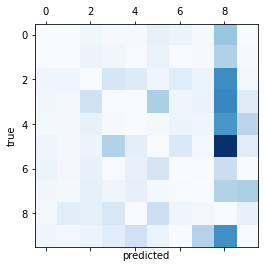

In [65]:
ifig=9;plt.close(ifig);plt.figure(ifig,figsize=(8,6), dpi=120)
plt.matshow(norm_conf_mx, cmap=plt.cm.Blues)
plt.xlabel('predicted')
plt.ylabel('true')

In [66]:
cl_3, cl_5 = 3,5
X_33 = X_train[(y_train == cl_3) & (y_train_pred == cl_3)]
X_35 = X_train[(y_train == cl_3) & (y_train_pred == cl_5)]
X_55 = X_train[(y_train == cl_5) & (y_train_pred == cl_5)]
X_53 = X_train[(y_train == cl_5) & (y_train_pred == cl_3)]

In [67]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

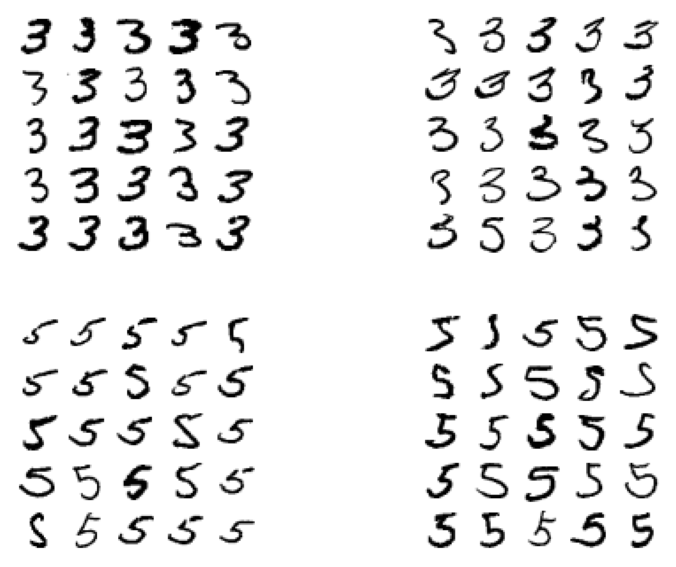

In [68]:
ifig=10;plt.close(ifig);plt.figure(ifig,figsize=(8,6), dpi=120)
plt.subplot(221); plot_digits(X_33[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_35[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_55[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_53[:25], images_per_row=5)